In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kstest

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest


In [51]:
#Importar os dados
df = pd.read_csv('base_dummy.csv')

In [52]:
#g = sns.pairplot(df)

# Avalio solucoes candidatas para variavel dependente

In [53]:
df_original = pd.read_csv('Base mesclada.csv')

In [54]:
objects = ['object']

df_original_objetos = df_original.select_dtypes(include=objects)

colunas_para_avaliar = df_original_objetos.columns

In [55]:
for col in colunas_para_avaliar:
    print(df_original_objetos.groupby([col],as_index=False).size())
    print()

  MSZoning  size
0  C (all)    25
1       FV   139
2       RH    26
3       RL  2265
4       RM   460

  Street  size
0   Grvl    12
1   Pave  2907

  Alley  size
0  Grvl   120
1  Pave    78

  LotShape  size
0      IR1   968
1      IR2    76
2      IR3    16
3      Reg  1859

  LandContour  size
0         Bnk   117
1         HLS   120
2         Low    60
3         Lvl  2622

  Utilities  size
0    AllPub  2916
1    NoSeWa     1

  LotConfig  size
0    Corner   511
1   CulDSac   176
2       FR2    85
3       FR3    14
4    Inside  2133

  LandSlope  size
0       Gtl  2778
1       Mod   125
2       Sev    16

   Neighborhood  size
0       Blmngtn    28
1       Blueste    10
2        BrDale    30
3       BrkSide   108
4       ClearCr    44
5       CollgCr   267
6       Crawfor   103
7       Edwards   194
8       Gilbert   165
9        IDOTRR    93
10      MeadowV    37
11      Mitchel   114
12        NAmes   443
13      NPkVill    23
14       NWAmes   131
15      NoRidge    71
16      Nr

Candidatos para variável dependentes:
- BsmtFinType1
- GarageFinish

In [56]:
df_original_objetos[['GarageFinish']].applymap(lambda x:str(x)).groupby(['GarageFinish']).size()

GarageFinish
Fin     719
RFn     811
Unf    1230
nan     159
dtype: int64

# Adicionei a base de dados as variáveis dependentes candidatas acima

In [57]:
colunas_escolhidas = ['BsmtFinType1','GarageFinish']
novas_colunas = ['Qualidade do acabamento do porão','Acabamento da Garagem']
df[novas_colunas] = df_original[colunas_escolhidas]

df.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim,Qualidade do acabamento do porão,Acabamento da Garagem
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0,ALQ,RFn
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0,GLQ,RFn
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0,ALQ,Unf
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0,GLQ,RFn


In [58]:
# Substituit o NaN pelo valor 'Nao possui'
def consertar(x):
    if str(x) == 'nan':
        return 'Nao possui'
    return x
    
df['Acabamento da Garagem'] = df[['Acabamento da Garagem']].applymap(consertar)
df['Qualidade do acabamento do porão'] = df[['Qualidade do acabamento do porão']].applymap(consertar)
df.isna().sum()

Preço da venda                      0
Zona                                4
Qualidade do Aquecimento            0
Número de Quartos                   0
Área da Garagem                     1
Área do Lote                        0
Número de Banheiros                 0
Idade do Imóvel                     0
Alta Densidade Residencial          0
Baixa Densidade Residencial         0
Comercial                           0
Média Densidade Residencial         0
Vila Flutuante Residencial          0
Bom                                 0
Excelente                           0
Médio                               0
Razoável                            0
Ruim                                0
Qualidade do acabamento do porão    0
Acabamento da Garagem               0
dtype: int64

In [59]:
# Excluir os valores NaN restantes
df = df.drop(df[df['Zona'].isna()].index)
df = df.drop(df[df['Área da Garagem'].isna()].index)
df.isna().sum()

Preço da venda                      0
Zona                                0
Qualidade do Aquecimento            0
Número de Quartos                   0
Área da Garagem                     0
Área do Lote                        0
Número de Banheiros                 0
Idade do Imóvel                     0
Alta Densidade Residencial          0
Baixa Densidade Residencial         0
Comercial                           0
Média Densidade Residencial         0
Vila Flutuante Residencial          0
Bom                                 0
Excelente                           0
Médio                               0
Razoável                            0
Ruim                                0
Qualidade do acabamento do porão    0
Acabamento da Garagem               0
dtype: int64

In [60]:
df.columns

Index(['Preço da venda', 'Zona', 'Qualidade do Aquecimento',
       'Número de Quartos', 'Área da Garagem', 'Área do Lote',
       'Número de Banheiros', 'Idade do Imóvel', 'Alta Densidade Residencial',
       'Baixa Densidade Residencial', 'Comercial',
       'Média Densidade Residencial', 'Vila Flutuante Residencial', 'Bom',
       'Excelente', 'Médio', 'Razoável', 'Ruim',
       'Qualidade do acabamento do porão', 'Acabamento da Garagem'],
      dtype='object')

In [61]:
# Verifico quais sao as variaveis nao categoricas
objects = ['object']
df_numerical = df.select_dtypes(exclude=objects)
colunas_para_LDA = df_numerical.columns
colunas_para_LDA

Index(['Preço da venda', 'Número de Quartos', 'Área da Garagem',
       'Área do Lote', 'Número de Banheiros', 'Idade do Imóvel',
       'Alta Densidade Residencial', 'Baixa Densidade Residencial',
       'Comercial', 'Média Densidade Residencial',
       'Vila Flutuante Residencial', 'Bom', 'Excelente', 'Médio', 'Razoável',
       'Ruim'],
      dtype='object')

# Verificar Pressupostos do LDA
- Normalidade multivariada Acho que OK!
- Linearidade ???????
- Ausência de outliers OK, só retirei os outliers!
- Ausência de multicolinearidade  (Conclusão: precisei descartar vários atributos - através do VIF - variance inflation factor - fator de inflação de variância)
- Homogeneidade das matrizes de variância/co-variância (Teria que usar função BoxM do R -> não fiz isso)

In [62]:
colunas_para_LDA

Index(['Preço da venda', 'Número de Quartos', 'Área da Garagem',
       'Área do Lote', 'Número de Banheiros', 'Idade do Imóvel',
       'Alta Densidade Residencial', 'Baixa Densidade Residencial',
       'Comercial', 'Média Densidade Residencial',
       'Vila Flutuante Residencial', 'Bom', 'Excelente', 'Médio', 'Razoável',
       'Ruim'],
      dtype='object')

### Ausência de multicolinearidade (Conclusão: precisei descartar vários atributos)

In [65]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df[colunas_para_LDA].to_numpy(), i) for i in range(df[colunas_para_LDA].shape[1])]
vif['Atributo'] = colunas_para_LDA
vif

/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Atributo
0,1.560332,Preço da venda
1,1.313615,Número de Quartos
2,1.555471,Área da Garagem
3,1.187081,Área do Lote
4,1.773849,Número de Banheiros
5,2.118099,Idade do Imóvel
6,inf,Alta Densidade Residencial
7,inf,Baixa Densidade Residencial
8,inf,Comercial
9,inf,Média Densidade Residencial


- VIF = 1: indica que não há correlação entre uma determinada variável explicativa e quaisquer outras variáveis explicativas no modelo.
- 1 < VIF <= 5: indica correlação moderada entre uma determinada variável explicativa e outras variáveis explicativas no modelo, mas isso geralmente não é severo o suficiente para requerer atenção.
- VIF > 5: Um valor maior que 5 indica correlação potencialmente severa entre uma determinada variável explicativa e outras variáveis explicativas no modelo. Nesse caso, as estimativas de coeficiente e os valores de p na saída da regressão provavelmente não são confiáveis.

In [66]:
novas_colunas = colunas_para_LDA.copy()

while True:
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df[novas_colunas].to_numpy(), i) for i in range(df[novas_colunas].shape[1])]
    vif['Atributo'] = novas_colunas
    id_excluir = vif['VIF'].idxmax()
    if vif['VIF'].max() > 5:
        novas_colunas = novas_colunas.drop(novas_colunas[id_excluir])
    else:
        break
vif

/Users/yamada/miniconda3/envs/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Atributo
0,2.920678,Área da Garagem
1,2.886081,Área do Lote
2,3.437154,Idade do Imóvel
3,1.053198,Comercial
4,1.525701,Média Densidade Residencial
5,1.101495,Vila Flutuante Residencial
6,1.425561,Bom
7,1.851966,Médio
8,1.142929,Razoável
9,1.006357,Ruim


### Ausência de outliers: Há outliers...eu tiro após a análise de multicolinearidade

In [68]:
df[novas_colunas]

,Área da Garagem,Área do Lote,Idade do Imóvel,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Médio,Razoável,Ruim
0,548.0,8450,5,0,0,0,0,0,0,0
1,460.0,9600,31,0,0,0,0,0,0,0
2,608.0,11250,7,0,0,0,0,0,0,0
3,642.0,9550,91,0,0,0,1,0,0,0
4,836.0,14260,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2914,0.0,1936,36,0,1,0,1,0,0,0
2915,286.0,1894,36,0,1,0,0,1,0,0
2916,576.0,20000,46,0,0,0,0,0,0,0
2917,0.0,10441,14,0,0,0,0,1,0,0


In [69]:
# IsolationForest(,0.1)
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df[novas_colunas])
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
df_para_LDA = df[novas_colunas][yhat == 1]
df_para_LDA

,Área da Garagem,Área do Lote,Idade do Imóvel,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Médio,Razoável,Ruim
0,548.0,8450,5,0,0,0,0,0,0,0
1,460.0,9600,31,0,0,0,0,0,0,0
2,608.0,11250,7,0,0,0,0,0,0,0
3,642.0,9550,91,0,0,0,1,0,0,0
4,836.0,14260,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2912,286.0,1533,36,0,1,0,0,1,0,0
2915,286.0,1894,36,0,1,0,0,1,0,0
2916,576.0,20000,46,0,0,0,0,0,0,0
2917,0.0,10441,14,0,0,0,0,1,0,0


### Normalidade multivariada (Não há)

In [78]:
# Teste da Normalidade multivariada
for atributo in df_para_LDA.columns:
    #Para teste de Normalidade usarei o teste de Kolmogorov-Smirnov (Aula MQA-Pressupostos, slide 11)
    print(kstest(df_para_LDA[atributo].to_numpy(), 'norm', N=100))

KstestResult(statistic=0.965675057208238, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8590195095468628, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


Todos os testes deram com pValue <= 5%, portanto, rejeito H0, ou seja, nenhuma distribuição é próxima de uma curva normal

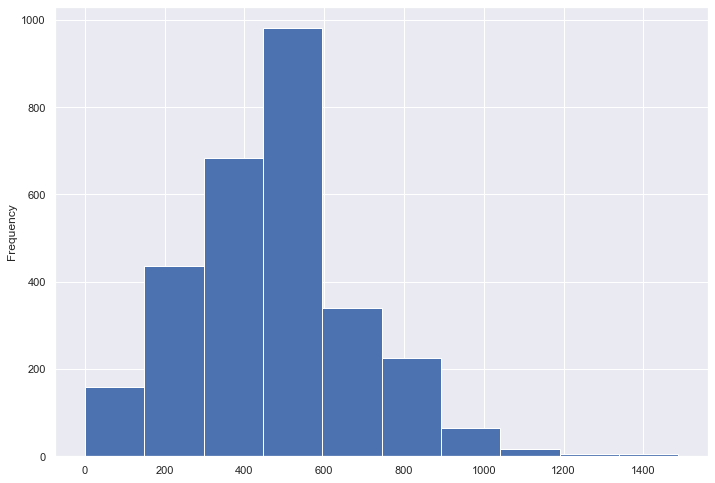

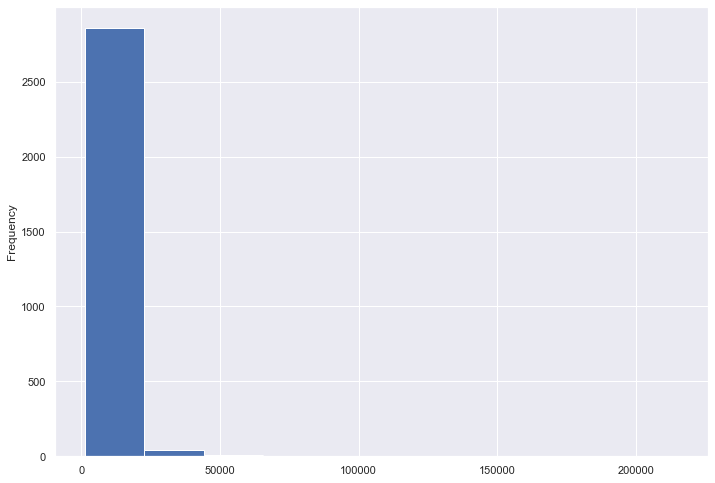

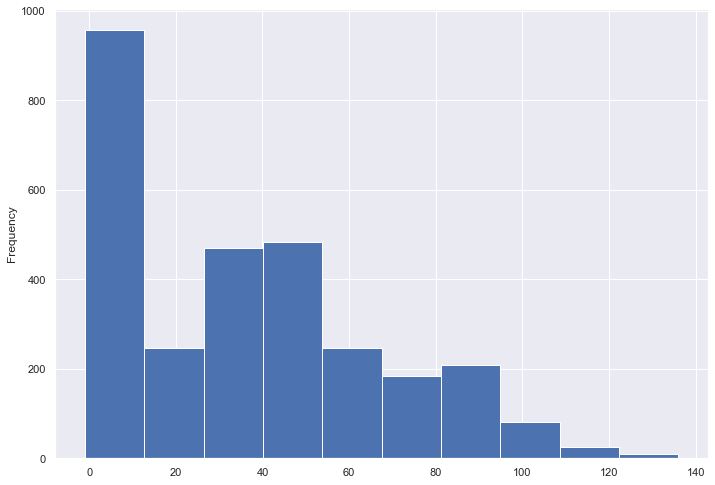

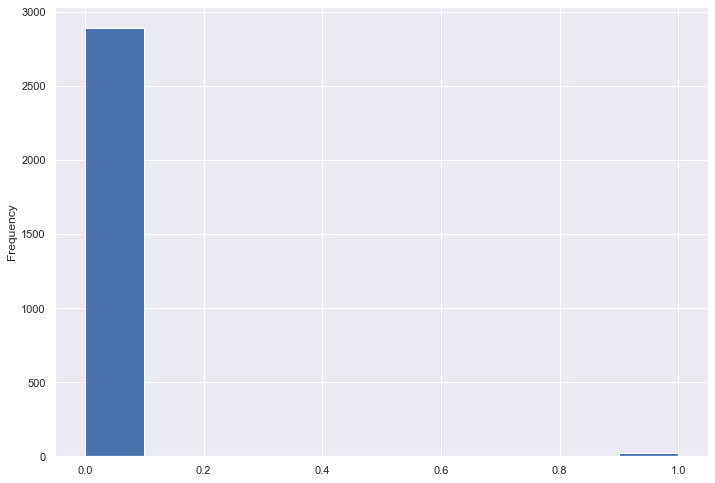

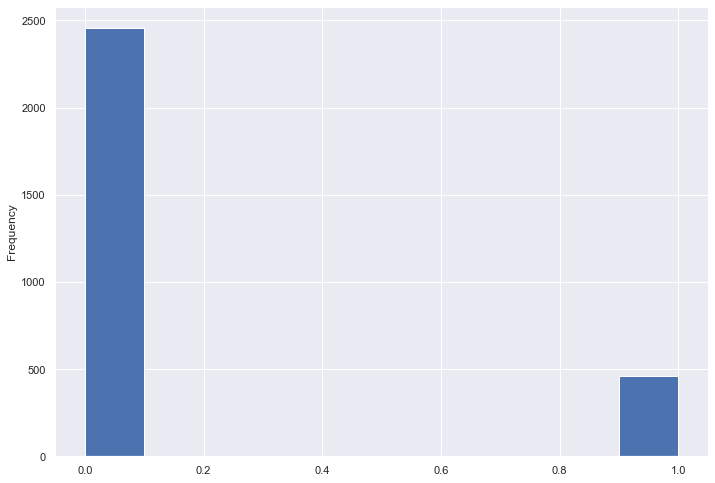

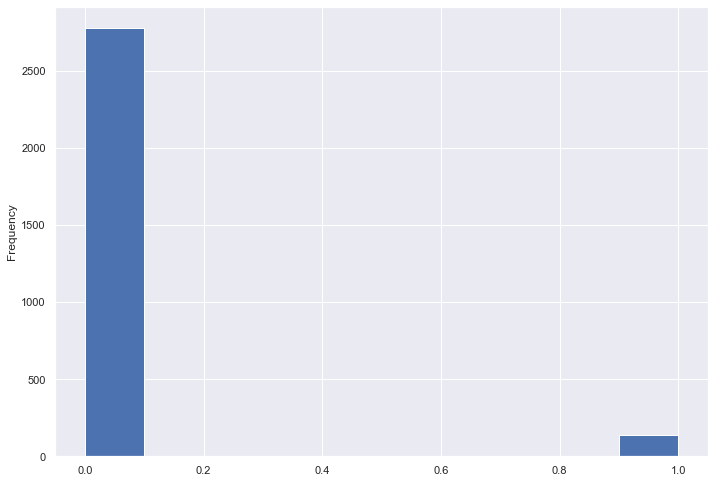

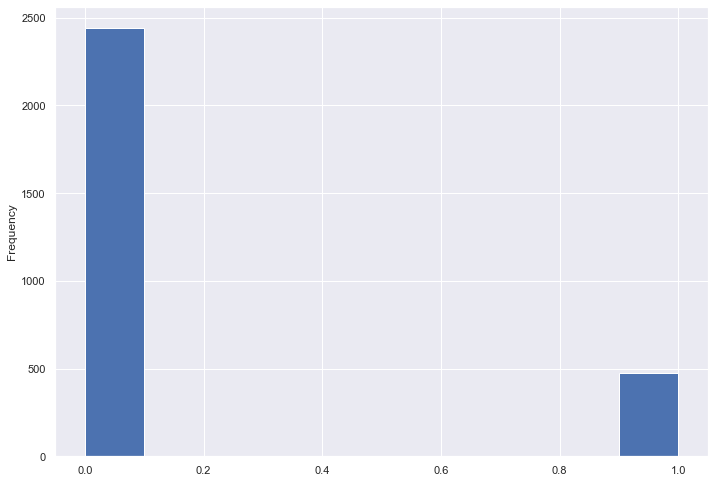

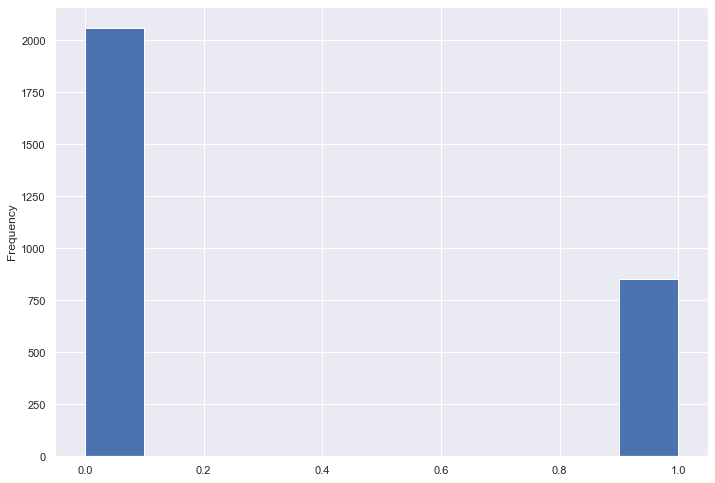

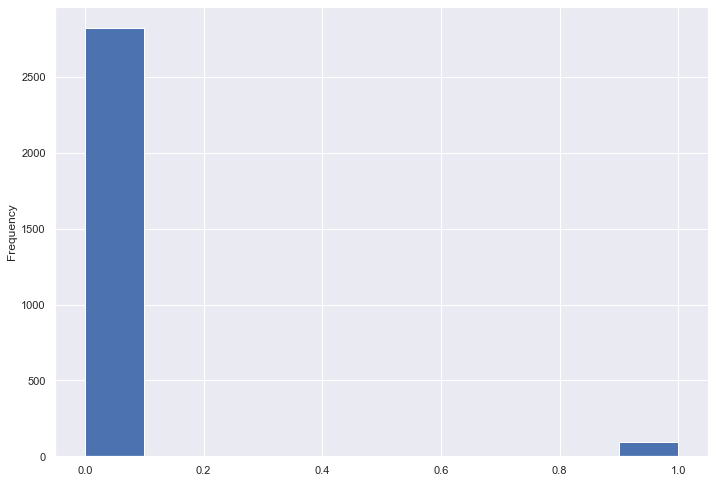

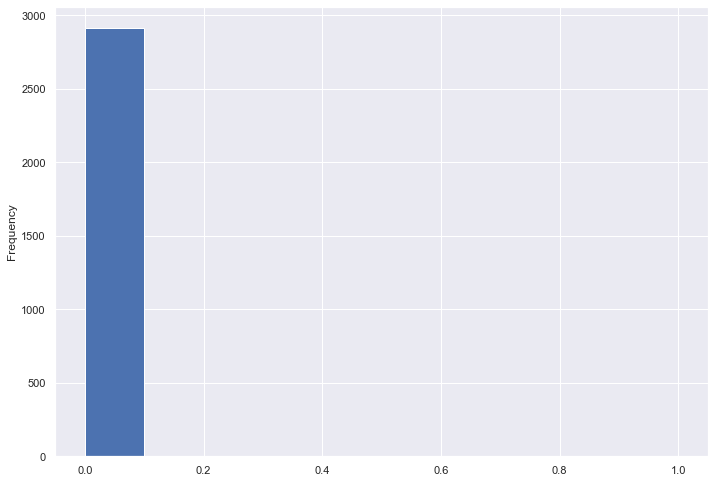

In [79]:
for atributo in df_para_LDA.columns:
    df[atributo].plot(kind='hist')
    plt.show()

## variável dependente: Qualidade do acabamento do porão

In [80]:
X = df_para_LDA.copy()
y = df['Qualidade do acabamento do porão'].loc[df_para_LDA.index]

In [81]:
# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo LDA
lda = LinearDiscriminantAnalysis()

# Executo o algoritmo o treinamento do modelo
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

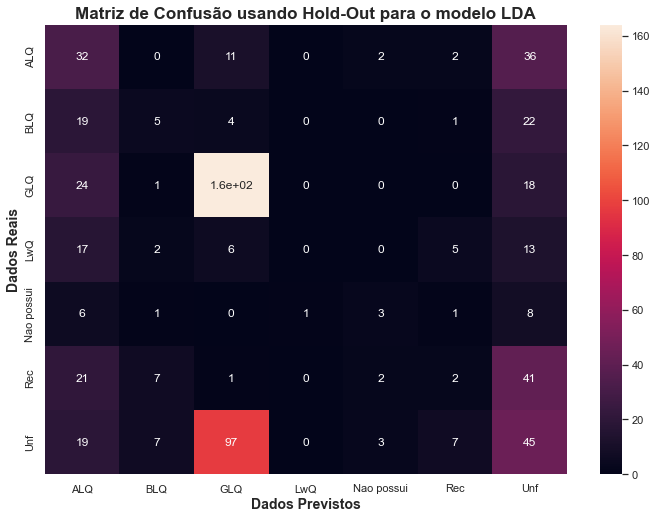

In [82]:
y_pred = lda.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
# ax.set(xlabel='Dados Previstos', ylabel='Dados Reais',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(20,15)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo LDA",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [83]:
# Separo conjunto de treinamento e teste para calculo da acuracidade real posterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Separo em 10 folds
scores = cross_val_score(lda, X_train, y_train, cv=10)
print('Acuracia Média do Cross Validation (10 folds):', scores.mean())

Acuracia Média do Cross Validation (10 folds): 0.3814979799026209


## variável dependente: Acabamento da Garagem

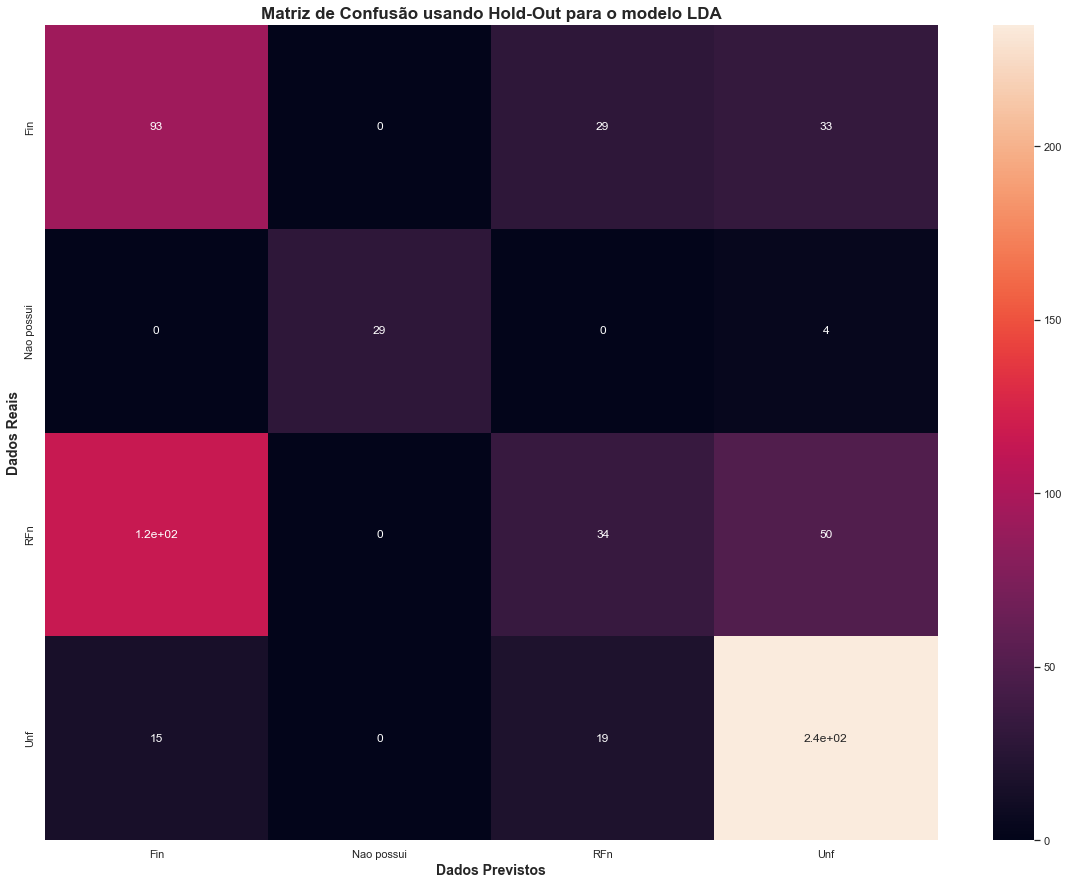

In [84]:
X = df_para_LDA.copy()
y = df['Acabamento da Garagem'].loc[df_para_LDA.index]

# Uso metodo holdout para separar conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Instancio o modelo LDA
lda = LinearDiscriminantAnalysis()

# Executo o algoritmo o treinamento do modelo
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, annot=True)
plt.xlabel("Dados Previstos",fontdict = {'fontsize':14,'fontweight':'bold'})
plt.ylabel("Dados Reais",fontdict = {'fontsize':14,'fontweight':'bold'})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Matriz de Confusão usando Hold-Out para o modelo LDA",fontdict = {'fontsize':17,'fontweight':'bold'})
plt.show()

In [85]:
# Separo conjunto de treinamento e teste para calculo da acuracidade real posterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Separo em 10 folds
scores = cross_val_score(lda, X_train, y_train, cv=10)
print('Acuracia Média do Cross Validation (10 folds):', scores.mean())

Acuracia Média do Cross Validation (10 folds): 0.5880296280948928
